In [1]:
from infer import PlantDiseaseClassifier
from PIL import Image
import plotly
import json
import os
from dataset import CLASS_MAP
from tqdm import tqdm_notebook
from sklearn.metrics import confusion_matrix

with open("metadata.json") as f:
    metadata = json.load(f)
test_set = [record for record in metadata if record["dataset"] == "test"]
pdc = PlantDiseaseClassifier("./models/wider_net.pth")

In [2]:
# Run inference on one image.
def get_img(record):
    base_path = "/home/pdoyle/ssd/datasets/plant_disease/PlantVillage"
    return Image.open(os.path.join(base_path, record["class"], record["image"]))

print(f"Real Class: {test_set[5]['class']}\tPredicted Class: {pdc.predict(get_img(test_set[5]))[0]}")

Real Class: Pepper__bell___Bacterial_spot	Predicted Class: bell_pepper_bacterial_spot


In [4]:
# Run inference on all test data.
def predict(record):
    return pdc.predict(get_img(record))
    
predicted = [pdc.predict(get_img(record)) for record in tqdm_notebook(test_set)]
truth_labels = [record["class_num"] for record in test_set]
pred_labels = [int(pred[1]) for pred in predicted]

In [17]:
cm = confusion_matrix(truth_labels, pred_labels)

In [23]:
import plotly.figure_factory as ff
colorscale = "Greens"
fig = ff.create_annotated_heatmap(cm, x=CLASS_MAP, y=CLASS_MAP, colorscale=colorscale)
fig['layout']['xaxis'].update(title="Predicted")
fig['layout']['yaxis'].update(title="Truth")
fig.show()

### Results Inspection
Tomato late blight and early blight share some ambiguity which is to be expected. (9% of them are confused with each other.)

There are three 3 bell peppers that are labeled as bacterial spot instead of healthy

There are 14 healthy potatoes being called late blight.

late blight in potatoes in the images below look almost like noise.  The real late blight potato images are much more seriously damaged.  These images are either mis-labeled or "late blight" looks nearly healthy

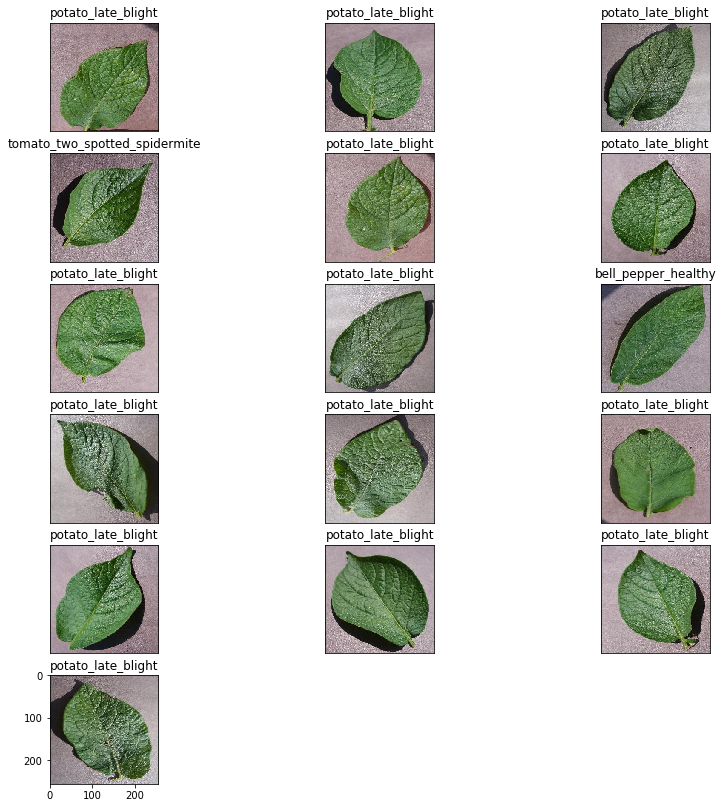

In [59]:
# Potato analysis.
import matplotlib.pyplot as plt
potato_truth = []
potato_pred = []
for i, p in enumerate(pred_labels):
    if test_set[i]["class_num"] == 5 and pred_labels[i] != 5:
        potato_truth.append(test_set[i])
        potato_pred.append(pred_labels[i])

plt.figure(figsize=(14,14))
columns = 3
for i, image in enumerate(potato_truth):
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.subplot(len(potato_truth) / columns + 1, columns, i + 1, title=CLASS_MAP[potato_pred[i]])
    plt.imshow(get_img(image))

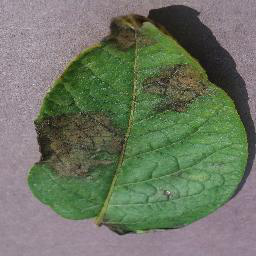

In [62]:
get_img(test_set[41])